## Multiple Linear Regression -- Prediction of profits generated by startups in USA


### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Importing Dataset

In [2]:
data=pd.read_csv("C://Users//Soundharyaa T V//Documents//ML Projects//Data//50_Startups.csv")

X=data[['R&D Spend','Administration','Marketing Spend','State']].values
y=data['Profit']


### Data Preprocessing

In [3]:
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Data Validity Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Data Completeness Check -- No Missing Values in Columns 

In [5]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


### Exploratory Data Analysis

In [6]:
data.describe()


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


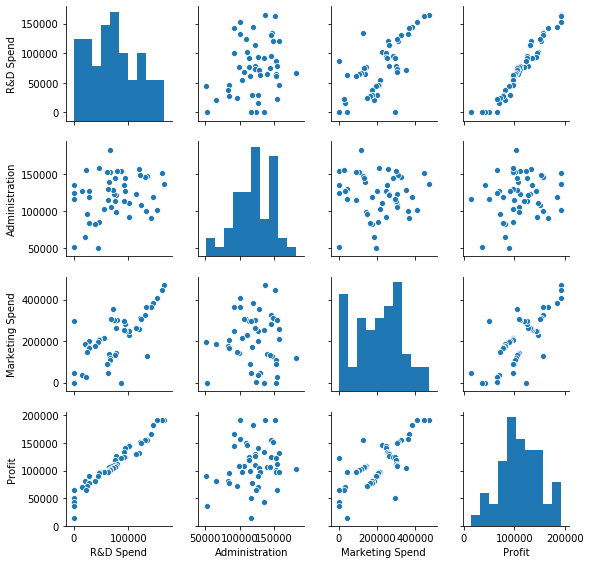

In [33]:
sns.pairplot(data,height=2)

Text(0.5, 1.0, 'Distribution of Price -- Target Variable')

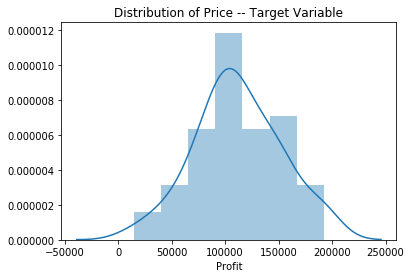

In [8]:
sns.distplot(data['Profit'])
plt.title('Distribution of Price -- Target Variable')

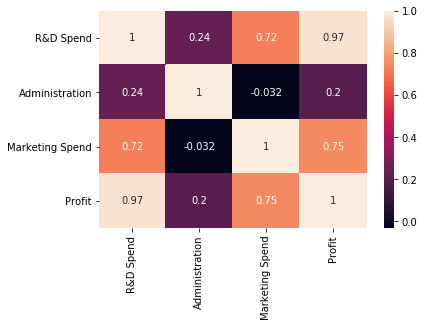

In [9]:
sns.heatmap(data.corr(),annot=True)

### Encoding Categorical Data -- State

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


### Splitting Dataset into Train and Test Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Training

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Prediction

In [13]:
y_predict = regressor.predict(X_test)
print(y_predict)

[103015.20159796 132582.27760816 132447.73845174  71976.09851258
 178537.48221055 116161.24230166  67851.69209676  98791.73374686
 113969.43533013 167921.06569551]


Text(0.5, 1.0, 'Actual Vs Predicted Profits')

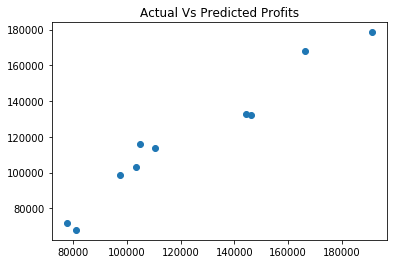

In [29]:
plt.scatter(y_test,y_predict)
plt.title("Actual Vs Predicted Profits")